In [1]:
# project: p13
# submitter: ccmaloney
# partner: jmaloney3
# hours: ???

In [155]:
import requests
import os
import pandas as pd
from pandas import DataFrame, Series
import sqlite3
import matplotlib
import numpy as np


In [14]:
# ensures that font.size setting remains permanent
%matplotlib inline 
pd.set_option('display.max_colwidth', None)
matplotlib.rcParams["font.size"] = 13 # don't use value > 13! Otherwise your y-axis tick labels will be different. 

In [15]:
# Returns True if file was downloaded, False if file already exists
def download(url, filename = None):
    if filename == None:
        filename = os.path.basename(url)
    # We do not download again if the file already exists
    if os.path.exists(filename):
        return False
    
    response = requests.get(url)
    response.raise_for_status()

    f = open(filename, "w", encoding="utf-8")
    f.write(response.text)
    f.close()

    return True

In [16]:
download("https://raw.githubusercontent.com/msyamkumar/cs220-f21-projects/main/p13/QSranking.json")

False

In [105]:
rankings = pd.read_json('QSranking.json')

In [18]:
conn = sqlite3.connect('rankings.db')
rankings.to_sql("rankings", conn, if_exists = "replace", index = False)

# remember to do conn.close() at the end of your notebook or your code may crash when we run test.py.

In [19]:
#Q1: In the year 2020, list the top 10 institutions in Canada which have the highest value in the column `international_students`.

pd.read_sql(
"""
SELECT institution_name, international_students
FROM rankings
WHERE country = "Canada" AND year = "2020"
ORDER BY international_students DESC
LIMIT 10
""", conn)



,institution_name,international_students
0,Mcgill University,96.2
1,University Of Toronto,93.0
2,Simon Fraser University,91.5
3,University Of Waterloo,84.1
4,University Of Alberta,80.8
5,University Of British Columbia,79.3
6,Dalhousie University,73.4
7,Université De Montréal,61.8
8,University Of Calgary,61.2
9,University Of Ottawa,56.7


In [32]:
#Q2: In the year 2019, list the top 10 institutions in the United States which have the highest score of (`academic_reputation + employer_reputation`).


pd.read_sql(
"""
SELECT institution_name, academic_reputation + employer_reputation AS reputation
FROM rankings
WHERE country = "United States" AND year = "2019"
ORDER BY reputation DESC, institution_name ASC
LIMIT 10
""", conn)


,institution_name,reputation
0,Harvard University,200.0
1,Massachusetts Institute Of Technology,200.0
2,Stanford University,200.0
3,"University Of California, Berkeley",199.8
4,Yale University,199.6
5,"University Of California, Los Angeles",199.1
6,Columbia University,197.1
7,Princeton University,196.6
8,University Of Chicago,190.3
9,Cornell University,189.2


In [43]:
#Q3: In the year 2020, list the top 10 countries which have the most institutions.

top_ten = pd.read_sql(
"""
SELECT country, COUNT(institution_name) AS num_of_institutions
FROM rankings
WHERE year = "2020"
GROUP BY country
ORDER BY num_of_institutions DESC, country ASC
LIMIT 10
""", conn)
top_ten
    

,country,num_of_institutions
0,United States,74
1,United Kingdom,45
2,Germany,23
3,Australia,21
4,Canada,14
5,China,14
6,France,14
7,Japan,14
8,Netherlands,13
9,Russia,13


AttributeError: 'AxesSubplot' object has no attribute 'ylabel'

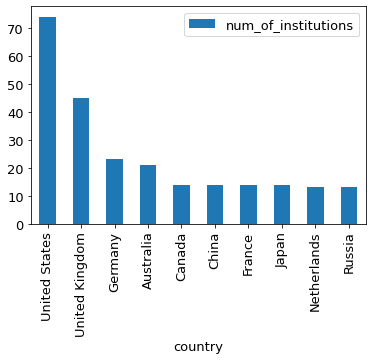

In [49]:
#Q4: In the year 2020, list the top 10 countries which have the most institutions. (answer with a plot)

ax = top_ten.plot.bar(x = 'country', y = 'num_of_institutions')
ax.get_legend().remove()


In [53]:
#Q5: In the year 2019, list the top 10 countries which have the highest total `overall_score`.

top_ten = pd.read_sql(
"""
SELECT country, SUM(overall_score) AS total_score
FROM rankings
WHERE year = "2019"
GROUP BY country
ORDER BY total_score DESC, country ASC
LIMIT 10
""", conn)
top_ten


,country,total_score
0,United States,4298.4
1,United Kingdom,2539.2
2,Germany,1098.2
3,Australia,1093.8
4,Japan,752.9
5,China,743.4
6,Canada,705.3
7,Netherlands,674.9
8,South Korea,612.8
9,France,595.2


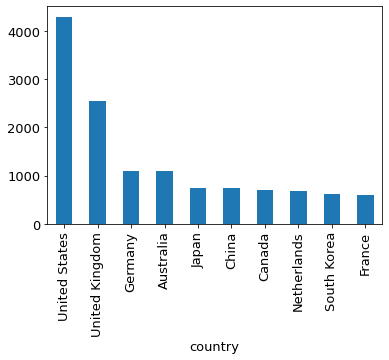

In [55]:
#Q6: In the year 2019, list the top 10 countries which have the highest total `overall_score`. (answer with a plot)

ax = top_ten.plot.bar(x = 'country', y = 'total_score')
ax.get_legend().remove()


In [63]:
#Q7: In the year 2020, list the top 10 institutions in the United States which have the highest score of (`international_faculty + international_students`).

pd.read_sql(
"""
SELECT institution_name, international_faculty + international_students AS international_score
FROM rankings
WHERE year = "2020" AND country = "United States"
ORDER BY international_score DESC, institution_name ASC
LIMIT 10
""", conn)


,institution_name,international_score
0,Massachusetts Institute Of Technology,194.1
1,California Institute Of Technology,186.7
2,Carnegie Mellon University,183.5
3,Rice University,180.4
4,Northeastern University,179.1
5,Stanford University,167.5
6,Cornell University,166.1
7,Purdue University,158.2
8,University Of Rochester,157.9
9,University Of Chicago,151.2


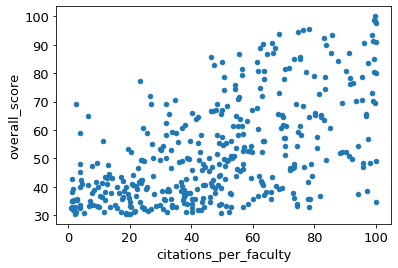

In [67]:
#Q8: In the year 2018, what is the relationship between `citations_per_faculty` and `overall_score`?

ax = pd.read_sql(
"""
SELECT citations_per_faculty, overall_score
FROM rankings
WHERE year = "2018"
""", conn).plot.scatter(x = 'citations_per_faculty', y = 'overall_score')
# ax.get_legend().remove()


In [102]:
#Q9: In the year 2019, what is the correlation between `(citations_per_faculty * international_faculty) / 100` and `overall_score`?

pd.read_sql(
"""
SELECT (citations_per_faculty * international_faculty) / 100 AS x, overall_score AS y
FROM rankings
WHERE year = "2019"
""", conn).corr().iloc[0, 1]


0.557397228343763

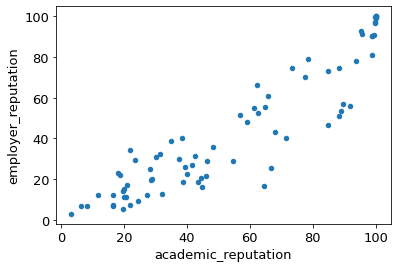

In [78]:
#Q10: In the year 2019, what is the relationship between `academic_reputation` and `employer_reputation` for institutions in United States?

ax = pd.read_sql(
"""
SELECT academic_reputation, employer_reputation
FROM rankings
WHERE year = "2019" AND country = "United States"
""", conn).plot.scatter(x = "academic_reputation", y = "employer_reputation")


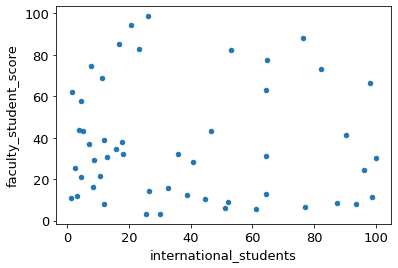

In [89]:
#Q11: In the year 2020, what is the relationship between `international_students` and `faculty_student_score` for the top institution in each country?

ax = pd.read_sql(
"""
SELECT international_students, MIN(faculty_student_score) AS faculty_student_score
FROM rankings
WHERE year = "2020"
GROUP BY country
""", conn).plot.scatter(x = "international_students", y = "faculty_student_score")


In [106]:
#Q12: Find the difference in correlation between `international_students` and `overall_score` in United States and United Kingdom for institutions ranked within the top 100 in the year 2020.

pd.read_sql(
"""
SELECT international_students, overall_score
FROM rankings
WHERE year = "2020" AND country = "United States" AND rank <= 100
""", conn).corr().iloc[0, 1] - pd.read_sql(
"""
SELECT international_students, overall_score
FROM rankings
WHERE year = "2020" AND country = "United Kingdom" AND rank <= 100
""", conn).corr().iloc[0, 1]


-0.18978846844574526

In [114]:
#Q13: In the year 2019, find the top 15 countries which have the highest sum of `(citations_per_faculty * international_faculty) / 100`.

pd.read_sql(
"""
SELECT country, SUM((citations_per_faculty * international_faculty) / 100) as sum_citations
FROM rankings
WHERE year = "2019"
GROUP BY country
ORDER BY sum_citations DESC
LIMIT 15
""", conn)


,country,sum_citations
0,United States,2623.8207
1,United Kingdom,2347.1602
2,Australia,1255.5530
3,Netherlands,748.4268
4,Canada,724.5029
5,Switzerland,561.8790
6,China,482.2577
7,Germany,455.5466
8,Hong Kong,375.3032
9,New Zealand,327.3357


In [115]:
#Q14: In the year 2019, among the institutions ranked within the top 300, find the average of `(citations_per_faculty * international_faculty) / 100` for each country.

pd.read_sql(
"""
SELECT country, AVG((citations_per_faculty * international_faculty) / 100) AS avg_citations
FROM rankings
WHERE year = "2019" AND rank <= 300
GROUP BY country
ORDER BY avg_citations DESC
""", conn)


,country,avg_citations
0,Singapore,80.150000
1,Switzerland,75.497000
2,Hong Kong,62.550533
3,Australia,61.362388
4,Netherlands,56.166733
5,New Zealand,53.226220
6,United Kingdom,52.889084
7,Canada,50.779723
8,Denmark,46.196200
9,Norway,46.083300


In [138]:
#Q15: In the year 2020, for each country, find the institution with the highest value for `(citations_per_faculty * international_faculty) / 100`.

pd.read_sql(
"""
SELECT country, institution_name, (citations_per_faculty * international_faculty) / 100 AS score
FROM rankings
WHERE year = "2020" AND score IS NOT NULL
ORDER BY score DESC, institution_name ASC
""", conn)


,country,institution_name,score
0,United States,Massachusetts Institute Of Technology,99.8000
1,United States,California Institute Of Technology,99.4000
2,Switzerland,Ecole Polytechnique Fédérale De Lausanne,98.9000
3,United States,Stanford University,98.4028
4,Switzerland,Eth Zurich,98.4000
...,...,...,...
391,Russia,Rudn University,0.1605
392,Russia,Bauman Moscow State Technical University,0.1020
393,Belarus,Belarus State University,0.0935
394,Philippines,University Of The Philippines,0.0378


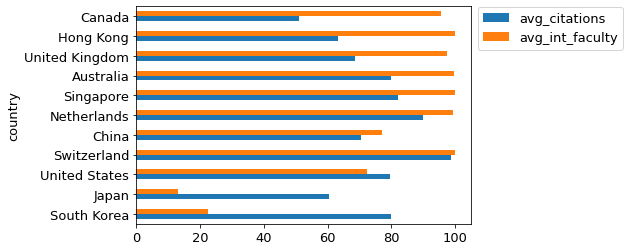

In [154]:
#Q16: In the year 2018, among the institutions ranked within the top 50, generate a barplot visualizing the average of `citations_per_faculty` and `international_faculty` for each country. (answer with a plot)

ax = pd.read_sql(
"""
SELECT country, AVG(citations_per_faculty) AS avg_citations, AVG(international_faculty) AS avg_int_faculty
FROM rankings
WHERE year = "2020" AND rank <= 50
GROUP BY country
ORDER BY avg_citations - avg_int_faculty DESC
""", conn).plot.barh(x = "country")
_ = ax.legend(loc='center left', bbox_to_anchor=(1, 0.9))




<AxesSubplot:xlabel='overall_score', ylabel='rank'>

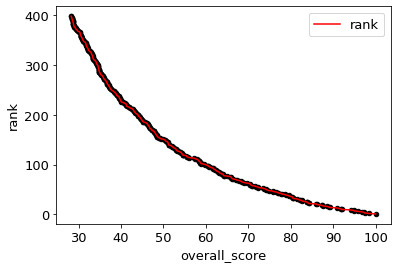

In [216]:
#Q17: For all the institutions in the year 2020, what is the relationship between `overall_score` and `rank`? (answer with a plot)

df = pd.read_sql(
"""
SELECT rank, overall_score
FROM rankings
WHERE year = "2020"
""", conn)

df["1"] = 1

res = np.linalg.lstsq(df[["overall_score", "1"]], df["rank"], rcond=None)

coefficients = res[0] # coefficients is (m,n)
m = coefficients[0] # slope
n = coefficients[1] # intercept
ax = df.plot.scatter(x='overall_score', y='rank', color='black')

df["fit"] = df["overall_score"] * m + n
df.plot.line(x='overall_score', y='rank', c='red', ax=ax)


In [ ]:
#Q18: For all the institutions in the year 2020, what is the relationship between  `1 / overall_score` and `rank`? (answer with a plot)





In [ ]:
#Q19: Use the regression line to estimate the rank of an institution with `overall_score` of 72.




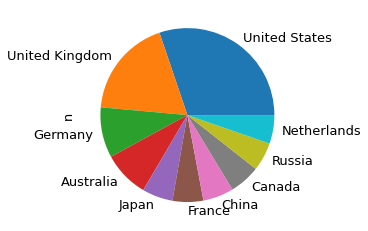

In [215]:
#Q20: What are the top 10 countries that have the most institutions in 2020? (answer with a plot)

df = pd.read_sql(
"""
SELECT country, COUNT(*) AS n
FROM rankings
WHERE year = "2020"
GROUP BY country
ORDER BY n DESC
LIMIT 10
""", conn)

df = df.set_index("country")

ax = df.plot.pie(y = "n")
# ax.title = "Number of institutions"
ax.get_legend().remove()




In [9]:
conn.close()